# Análisis de los diferentes datasets

En este notebook cargaremos y limpiaremos los dataset definitivos, dejándolos listos para su análisis.

# 1 - Limpiar y combinar datasets

In [10]:
# Libraries
import os
import re
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Validate if the path exists before adding it
current_directory = os.getcwd()
root_path = os.path.abspath(os.path.join(current_directory, '..')) 
if os.path.exists(root_path) and root_path not in sys.path: 
    sys.path.append(root_path)
                        
from utils import vizdatatools as viz
from utils.functions import convert_coordinate

## 1.1 - Cargar datasets

In [11]:
# Load datasets
df_idema = pd.read_csv('../data/raw/EMA_info_raw.csv')
df_month_year_climate = pd.read_csv('../data/raw/BC_month_year_climate_raw.csv')
df_anual_climate = pd.read_csv('../data/raw/BC_anual_climate_raw.csv')

# display(df_idema.info())
# display(df_month_year_climate.info())
# display(df_anual_climate.info())


## 1.2 Inspección dataset "EMA_info"

In [12]:
df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    object 
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 51.9+ KB


In [13]:
df_idema

,latitud,provincia,altitud,idema,nombre,indsinop,longitud
0,394924N,ILLES BALEARS,490,B013X,"ESCORCA, LLUC",8304.0,025309E
1,394744N,ILLES BALEARS,5,B051A,"SÓLLER, PUERTO",8316.0,024129E
2,394121N,ILLES BALEARS,60,B087X,BANYALBUFAR,NaN,023046E
3,393445N,ILLES BALEARS,52,B103B,ANDRATX - SANT ELM,99103.0,022208E
4,393305N,ILLES BALEARS,50,B158X,"CALVIÀ, ES CAPDELLÀ",NaN,022759E
...,...,...,...,...,...,...,...
942,424131N,LLEIDA,2467,9988B,CAP DE VAQUÈIRA,8936.0,005826E
943,424201N,LLEIDA,1161,9990X,"NAUT ARAN, ARTIES",8107.0,005237E
944,424634N,LLEIDA,722,9994X,BOSSÒST,NaN,004123E
945,430528N,NAVARRA,334,9995Y,VALCARLOS/LUZAIDE,NaN,011803W


Longitud y Latitud son "strings" y quiero convertirlos en números enteros para poder pintarlos en un scatter en el fúturo.

Las coordenadas geográficas suelen tener la siguiente estructura:

- Latitud: grados (0-90) con una dirección (N o S).
- Longitud: grados (0-180) con una dirección (E o W).

En España solo tenemos latitudes N, y longitudes E y W (separadas por el meridiano de Greenwich). Hay que aplicar una conversión para poder trabajar con los datos que proporciona AEMET. Para ello he contruido la función `convert_coordinate`


In [14]:
df_idema['latitud'] = df_idema['latitud'].apply(convert_coordinate)
df_idema['longitud'] = df_idema['longitud'].apply(convert_coordinate)

In [15]:
df_idema

,latitud,provincia,altitud,idema,nombre,indsinop,longitud
0,39.823333,ILLES BALEARS,490,B013X,"ESCORCA, LLUC",8304.0,2.885833
1,39.795556,ILLES BALEARS,5,B051A,"SÓLLER, PUERTO",8316.0,2.691389
2,39.689167,ILLES BALEARS,60,B087X,BANYALBUFAR,NaN,2.512778
3,39.579167,ILLES BALEARS,52,B103B,ANDRATX - SANT ELM,99103.0,2.368889
4,39.551389,ILLES BALEARS,50,B158X,"CALVIÀ, ES CAPDELLÀ",NaN,2.466389
...,...,...,...,...,...,...,...
942,42.691944,LLEIDA,2467,9988B,CAP DE VAQUÈIRA,8936.0,0.973889
943,42.700278,LLEIDA,1161,9990X,"NAUT ARAN, ARTIES",8107.0,0.876944
944,42.776111,LLEIDA,722,9994X,BOSSÒST,NaN,0.689722
945,43.091111,NAVARRA,334,9995Y,VALCARLOS/LUZAIDE,NaN,-1.300833


In [16]:
df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    float64
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 51.9+ KB


Ahora ya tengo una coordenadas numéricas con las que puedo trabajar

<Axes: xlabel='longitud', ylabel='latitud'>

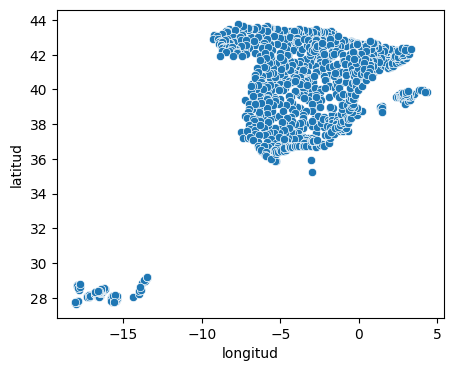

In [17]:
plt.figure(figsize=(5, 4))
sns.scatterplot(df_idema, x = 'longitud', y = 'latitud')

In [18]:
# Save dataset processed
df_idema.to_csv('../data/processed/EMA_info.csv', index = False)

In [19]:
df_idema.nombre.nunique()

934

## 1.3 Inspección dataset "BC_month_year_climate"


In [20]:
df_month_year_climate

,fecha,idema,p_max,hr,nw_55,tm_min,ta_max,ts_min,nt_30,w_racha,...,q_max,q_mar,q_med,q_min,inso,p_sol,ts_20,ts_10,ts_50,glo
0,2009-10,1012P,35.2(22),74.0,1.0,12.7,30.8(06),22.9,1.0,16/15.3(20),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-11,1012P,NaN,67.0,14.0,10.6,26.9(01),17.2,0.0,25/27.2(07),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12,1012P,NaN,73.0,10.0,6.6,19.6(29),16.0,0.0,14/26.1(21),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-1,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-2,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,2024-9,9178X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11444,2024-3,9178X,20.8(07),73.0,NaN,3.4,24.1(22),11.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11445,2024-4,9178X,10.4(27),65.0,NaN,4.5,27.2(13),11.8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11446,2024-5,9178X,22.8(18),67.0,NaN,7.5,26.4(28),12.7,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_month_year_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fecha    11448 non-null  object 
 1   idema    11448 non-null  object 
 2   p_max    10419 non-null  object 
 3   hr       9111 non-null   float64
 4   nw_55    7747 non-null   float64
 5   tm_min   10148 non-null  float64
 6   ta_max   10143 non-null  object 
 7   ts_min   10115 non-null  float64
 8   nt_30    10143 non-null  float64
 9   w_racha  7772 non-null   object 
 10  np_100   10410 non-null  float64
 11  nw_91    7747 non-null   float64
 12  np_001   10410 non-null  float64
 13  ta_min   10148 non-null  object 
 14  w_rec    7463 non-null   float64
 15  e        9176 non-null   float64
 16  np_300   10410 non-null  float64
 17  p_mes    10423 non-null  float64
 18  w_med    8550 non-null   float64
 19  nt_00    10148 non-null  float64
 20  ti_max   10110 non-null  float64
 21  tm_mes   101

Voy a combinar los datos de los EMA, con los datos climáticos mensuales anuales del País Vasco, así tendré en un único dataset toda la información climática y de las estaciones metereológicas

In [22]:
df_basque_country = df_month_year_climate.merge(df_idema, how = 'left', on = 'idema')
df_basque_country

,fecha,idema,p_max,hr,nw_55,tm_min,ta_max,ts_min,nt_30,w_racha,...,ts_20,ts_10,ts_50,glo,latitud,provincia,altitud,nombre,indsinop,longitud
0,2009-10,1012P,35.2(22),74.0,1.0,12.7,30.8(06),22.9,1.0,16/15.3(20),...,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
1,2009-11,1012P,NaN,67.0,14.0,10.6,26.9(01),17.2,0.0,25/27.2(07),...,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
2,2009-12,1012P,NaN,73.0,10.0,6.6,19.6(29),16.0,0.0,14/26.1(21),...,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
3,2009-1,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
4,2009-2,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,2024-9,9178X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,42.670556,ARABA/ALAVA,570,CAMPEZO/KANPEZU,NaN,-2.346111
11444,2024-3,9178X,20.8(07),73.0,NaN,3.4,24.1(22),11.0,0.0,NaN,...,NaN,NaN,NaN,NaN,42.670556,ARABA/ALAVA,570,CAMPEZO/KANPEZU,NaN,-2.346111
11445,2024-4,9178X,10.4(27),65.0,NaN,4.5,27.2(13),11.8,0.0,NaN,...,NaN,NaN,NaN,NaN,42.670556,ARABA/ALAVA,570,CAMPEZO/KANPEZU,NaN,-2.346111
11446,2024-5,9178X,22.8(18),67.0,NaN,7.5,26.4(28),12.7,0.0,NaN,...,NaN,NaN,NaN,NaN,42.670556,ARABA/ALAVA,570,CAMPEZO/KANPEZU,NaN,-2.346111


In [23]:
df_basque_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      11448 non-null  object 
 1   idema      11448 non-null  object 
 2   p_max      10419 non-null  object 
 3   hr         9111 non-null   float64
 4   nw_55      7747 non-null   float64
 5   tm_min     10148 non-null  float64
 6   ta_max     10143 non-null  object 
 7   ts_min     10115 non-null  float64
 8   nt_30      10143 non-null  float64
 9   w_racha    7772 non-null   object 
 10  np_100     10410 non-null  float64
 11  nw_91      7747 non-null   float64
 12  np_001     10410 non-null  float64
 13  ta_min     10148 non-null  object 
 14  w_rec      7463 non-null   float64
 15  e          9176 non-null   float64
 16  np_300     10410 non-null  float64
 17  p_mes      10423 non-null  float64
 18  w_med      8550 non-null   float64
 19  nt_00      10148 non-null  float64
 20  ti_max

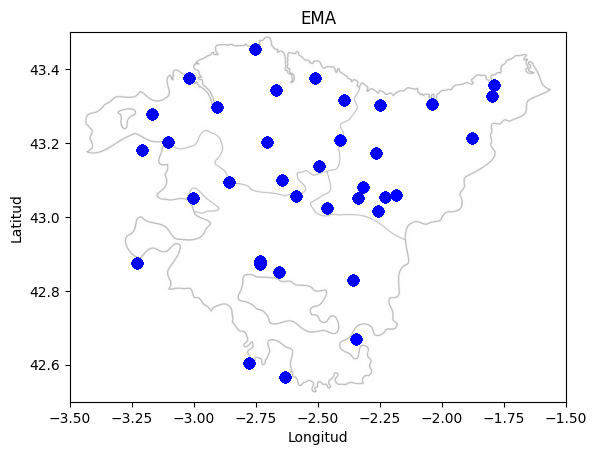

In [24]:
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

# Carga la imagen
image_path = '../img/basque_country_map.jpg'
image = mpimg.imread(image_path)

# Datos para el gráfico de dispersión
x = df_basque_country.longitud
y = df_basque_country.latitud

# Configura el gráfico
fig, ax = plt.subplots()

# Agrega la imagen de fondo
extent = [-3.5, -1.5, 42.5, 43.5]  # Ajusta los valores según tus datos
ax.imshow(image, extent=extent, aspect='auto', alpha=0.3)

# Crea el gráfico de dispersión
ax.scatter(x, y, c='blue', s=50)  # Personaliza color y tamaño de puntos

# Ajusta los límites del eje
ax.set_xlim([-3.5, -1.5])
ax.set_ylim([42.5, 43.5])

# (Opcional) Agrega etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('EMA')

# Muestra el gráfico
plt.show()

Guardo el dataset completo en un fichero .csv, y concluyo la inspección de datos. Ya me vuelco completamente en el EDA

In [25]:
df_basque_country.to_csv('../data/processed/BC_month_year_climate.csv', index=False)